# Исследование объявлений о продаже квартир

В этой работе используются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определять рыночную стоимость объектов недвижимости. Задача: установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. 

# Порядок выполнения работы
<b>Шаг 1. [Открыть файл с данными и изучить общую информацию](#Открыть-файл-с-данными-и-изучите-общую-информацию) </b>

1. Загрузить данные из файла в датафрейм.
2. Изучить общую информацию о полученном датафрейме.
3. Построить общую гистограмму для всех столбцов таблицы.

<b>Шаг 2.  [Предобработка данных](#Предобработка-данных) </b>
1. Найти и изучить пропущенные значения в столбцах:
    - Определите, в каких столбцах есть пропуски.
    - Заполните пропущенные значения там, где это возможно. Если логичную замену предложить невозможно, то оставить эти значения пустыми. 
    - Описать причины, которые могли привести к пропускам в данных.
    
2. Рассмотреть типы данных в каждом столбце:
    - Найти столбцы, в которых нужно изменить тип данных.
    - Преобразовать тип данных в выбранных столбцах.
    - Пояснить, почему нужно изменить тип данных.

3. Изучить уникальные значения в столбце с названиями и устраните неявные дубликаты.

4. Найдите и устраните редкие и выбивающиеся значения.
    - Если природа аномалии понятна и данные действительно искажены, то восстановить корректное значение.
    - В противном случае удалить редкие и выбивающиеся значения.
    - Описать, какие особенности в данных были обнаружены.

<b>Шаг 3. [Добавить в таблицу новые столбцы со следующими параметрами:](#Посчитайть-и-добавить-в-таблицу-новые-столбцы) </b>

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

<b>Шаг 4. [Провести исследовательский анализ данных:](#Провести-исследовательский-анализ-данных)</b>

1. Изучите следующие параметры объектов:
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления.
    
    Построить отдельные гистограммы для каждого из этих параметров. Описать все наблюдения по параметрам.
    
2. Изучить, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.
    - Построить гистограмму.
    - Посчитайть среднее и медиану.
    - Описать, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
   Изучить, зависит ли цена от:
   - общей площади;
   - жилой площади;
   - площади кухни;
   - количества комнат;
   - этажа, на котором расположена квартира (первый, последний, другой);
   - даты размещения (день недели, месяц, год).
   
   Построить графики, которые покажут зависимость цены от указанных выше параметров.
   
4. Посчитайть среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
5. По расстоянию до центра в километрах выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.

<b>Шаг 5. [Написать общий вывод](#Общий-вывод)</b>

Описать полученные результаты и зафиксировать основной вывод проведённого исследования.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # получение данных 

In [3]:
display(data.info()) # вывод информации о данных
display(data.tail(20))
data_count = data['total_images'].count() 
print(data_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23680,14,5000000.0,59.00,2019-04-04T00:00:00,3,2.50,5.0,52.0,1,NaN,...,7.00,NaN,Санкт-Петербург,26835.0,11878.0,0.0,NaN,0.0,NaN,NaN
23681,13,5250000.0,43.00,2018-05-11T00:00:00,2,2.50,5.0,29.0,2,NaN,...,6.00,NaN,Санкт-Петербург,28323.0,7262.0,1.0,497.0,2.0,660.0,80.0
23682,11,2350000.0,35.60,2016-06-23T00:00:00,1,2.50,5.0,17.0,4,False,...,8.30,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.5,3,NaN,...,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23686,8,3300000.0,31.00,2017-04-29T00:00:00,1,2.55,9.0,18.0,6,NaN,...,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23687,6,3200000.0,39.00,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,15.00,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0


23699


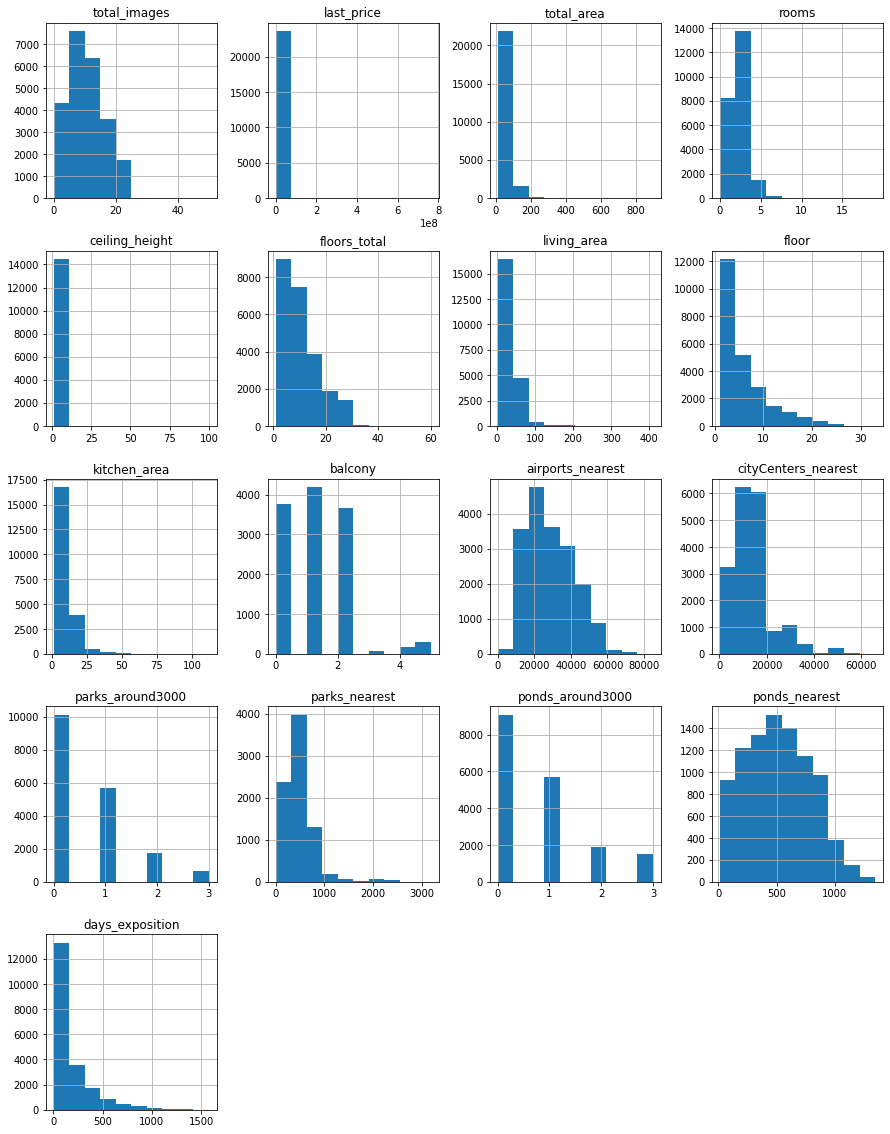

In [4]:
data.hist(figsize=(15, 20)); # построение гистограммы

### Предобработка данных

#### Нахождение и изучение пропущенных значений

In [5]:
data.isna().sum() # вычисление количества пропусков 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data = data.fillna(value={'kitchen_area':0, 'balcony':0, 'parks_around3000':0, 'ponds_around3000':0, 'days_exposition':0})# замена пропусков в части столбцов
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

Остались пропуски в колонках: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`.

Вероятно, пользователи не оставили информацию для колонок: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `locality_name`. 

Пропуски в географических данных видимо связаны с ошибкой системы, вычисляющей расстояния для столбцов: `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`.

Наличие пропусков в колонке `days_exposition` может быть связаны с тем, что пользователи еще не сняли объявление, поэтому можно заменить пропуски в этой колонке на 0. Также, в части случаев, это может быть просто ошибка системы. 



#### Рассмотрение типов данных в каждом столбце

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Нужно поменять тип данных в столбцах `floors_total`, `balcony`, `days_exposition`, `parks_around3000`, `ponds_around3000`,  на *int*, поскольку число этажей, балконов, дней, парков, прудов могут быть тлько целыми числами. 

Также приведем столбец `first_day_exposition` к типу данных *datetime*.

In [10]:


data = data.dropna(subset=['floors_total']) # удаление пропусков в колонке floors_total
data = data.astype({'floors_total':'int', 'balcony':'int', 'days_exposition':'int', 'parks_around3000':'int',
                    'ponds_around3000':'int'}, errors='ignore') # изменение типов данных
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')



In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

#### Изучение уникальных значений в столбце с названиями и устрание неявных дубликатов

In [12]:
data['locality_name'] = (data['locality_name'].str.replace('посёлок', 'поселок')
                         .replace('поселок городского типа','городской поселок')) # изменение названий
data.drop_duplicates(subset=['locality_name']) #удаление дубликатов

print(data['locality_name'].sort_values().unique()) # печать изменнного списка названий 



['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Будогощь' 'городской поселок Виллози'
 'городской поселок Лесогорский' 'городской поселок Мга'
 'городской поселок Назия' 'городской поселок Новоселье'
 'городской поселок Павлово' 'городской поселок Рощино'
 'городской поселок Свирьстрой' 'городской поселок Советский'
 'городской поселок Фёдоровское' 'городской поселок Янино-1'
 'деревня Агалатово' 'деревня Аро' 'деревня Батово' 'деревня Бегуницы'
 'деревня Белогорка' 'деревня Больша

#### Нахождение и устранение редких и выбивающихся значений

In [13]:
print(data['ceiling_height'].sort_values(ascending=False)) # данные до изменениия
data_too_hight_ceiling = data.query('ceiling_height > 11')['ceiling_height'].index # получение индексов квартир, с слишком высоким расстоянием до потолка 
data.loc[data_too_hight_ceiling, 'ceiling_height'] = data.loc[data_too_hight_ceiling, 'ceiling_height'] / 10 #делим высоту до потолка, у найденных данных, на 10

ceiling_height_mediana = data['ceiling_height'].median()

data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_mediana) # заполнение пропусков медианным значением

data = data.loc[data['ceiling_height'] >=2.35] # удаляем выбросы по столбцу 'ceiling_height'

print(data['ceiling_height'].sort_values(ascending=False))# данные после изменениия




22869    100.0
3148      32.0
22336     32.0
21377     27.5
20478     27.0
         ...  
23687      NaN
23690      NaN
23692      NaN
23695      NaN
23696      NaN
Name: ceiling_height, Length: 23613, dtype: float64
22309    10.3
22869    10.0
5863      8.3
3474      8.0
17442     8.0
         ... 
13462     2.4
5918      2.4
7270      2.4
14345     2.4
21401     2.4
Name: ceiling_height, Length: 23589, dtype: float64


In [14]:
data = data.query('airports_nearest != 0') # убираем строку с выбросом в колонке airports_nearest


В предложенных данных есть квартиры, у которых указана высота до потолка > 11 метров. 
Для таких случаев можно предположить, что высота должна быть в 10 раз больше. Также логично предположить, что высота до потолка должна быть как минимум больше 1.7 м, но меньше 11 м.

В предложенных данных есть строка, у которой в столбце `airports_nearest` стоит значение 0. Видимо при записи данных возникла ошибка, поэтому стоит эту строку удалить.

In [15]:
living_area_mean = data['living_area'].median()
data['living_area'] = data['living_area'].fillna(living_area_mean) # заполнение пропусков медианным значением

print(data.isna().sum())


data = data.query('(27 <= total_area <= 200) & (rooms <= 7) & (rooms != 0) & (2 <= floors_total <= 27)\
                  & (13 <= living_area <= 160) &  ( kitchen_area <= 50) & (1170000 <= last_price <= 60170000)\
                  & (days_exposition <= 1331) & (1 <= floor <= 25)') # удаляем выбросы из данных 


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20817
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5517
cityCenters_nearest      5494
parks_around3000            0
parks_nearest           15548
ponds_around3000            0
ponds_nearest           14532
days_exposition             0
dtype: int64


По гистограммам можно определить выбросы в столбцах `total_area`, `rooms`, `floors_total`, `living_area`, `kitchen_area`, `last_price`, `days_exposition`, `floor`.

In [16]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22269 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22269 non-null  int64         
 1   last_price            22269 non-null  float64       
 2   total_area            22269 non-null  float64       
 3   first_day_exposition  22269 non-null  datetime64[ns]
 4   rooms                 22269 non-null  int64         
 5   ceiling_height        22269 non-null  float64       
 6   floors_total          22269 non-null  int64         
 7   living_area           22269 non-null  float64       
 8   floor                 22269 non-null  int64         
 9   is_apartment          2655 non-null   object        
 10  studio                22269 non-null  bool          
 11  open_plan             22269 non-null  bool          
 12  kitchen_area          22269 non-null  float64       
 13  balcony         

In [17]:

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные



(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,269.00","22,269.00","22,269.00","22,269.00","22,269.00","22,269.00","22,269.00","22,269.00","22,269.00"
min,1.00,27.00,2.40,0.00,"1,170,000.00",13.00,0.00,1.00,2.00
max,7.00,200.00,10.30,"1,325.00","59,534,892.00",159.60,50.00,25.00,27.00


In [18]:
data.rooms.value_counts().to_frame()

,rooms
2,7684
1,7455
3,5677
4,1114
5,260
6,59
7,20


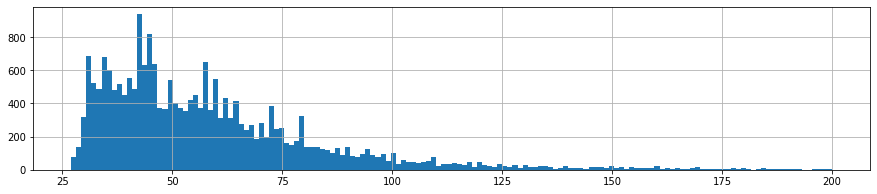

In [19]:

data.total_area.hist(bins = 150, figsize = (15,3));

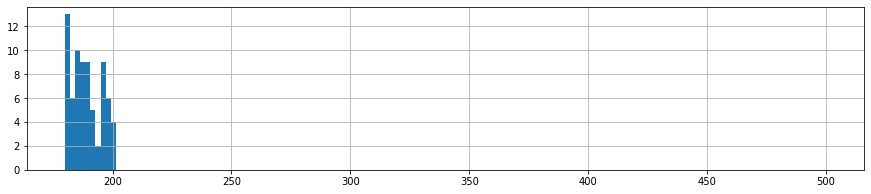

In [20]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [21]:


# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,29.40,2.50,0.00,"1,400,000.00",14.10,0.00,1.00,2.00
0.5,2.00,52.60,2.65,74.00,"4,700,000.00",30.00,9.00,4.00,9.00
0.9,3.00,91.30,3.00,423.00,"10,500,000.00",53.00,15.00,13.00,22.00
0.9976,6.00,184.17,4.00,"1,182.56","40,000,000.00",117.06,41.06,24.00,27.00


### Посчитаем и добавим в таблицу новые столбцы

In [22]:
data['price_per_meter'] = data['last_price'] / data['total_area'] # добавим колонку цена за квадратный метр

data['day_of_week'] = data['first_day_exposition'].dt.dayofweek # получение дня недели

data['month'] = data['first_day_exposition'].dt.month # получение месяца

data['year'] = data['first_day_exposition'].dt.year # получение года

data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000) # получение расстояния до центра города в километрах

In [23]:
def group(data, group_column): # функция для добавления типа этажа квартиры 
    for column_value, column_slice in data.groupby(group_column): 
        if column_value == 1:
            data.loc[column_slice.index, 'floor_type'] = 'первый'
        else:
            eqv = column_slice[group_column] == column_slice['floors_total']
            data.loc[column_slice.loc[eqv].index, 'floor_type'] = 'последний'
            data.loc[column_slice.loc[~eqv].index, 'floor_type'] = 'другой'
    return data

In [24]:
data = group(data, 'floor')

In [25]:
# check
data['floor_type'].value_counts()

другой       16498
последний     3068
первый        2703
Name: floor_type, dtype: int64

### Проведем исследовательский анализ данных

#### Изучим параметры [объектов](#Порядок-выполнения-работы)

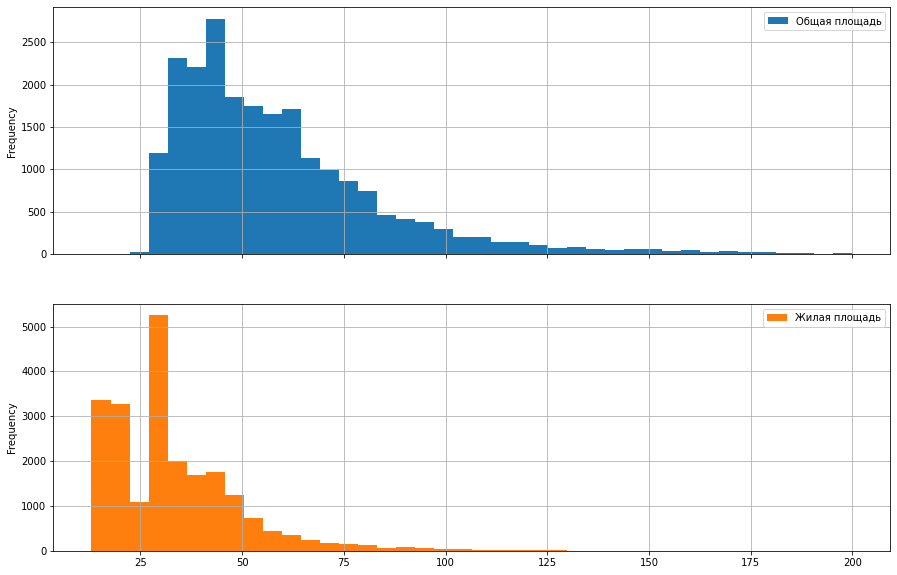

In [26]:

data.plot(kind='hist', y=['total_area', 'living_area'], bins=40, 
          label=['Общая площадь', 'Жилая площадь'], grid=True, legend=True, subplots=True, figsize=(15, 10));

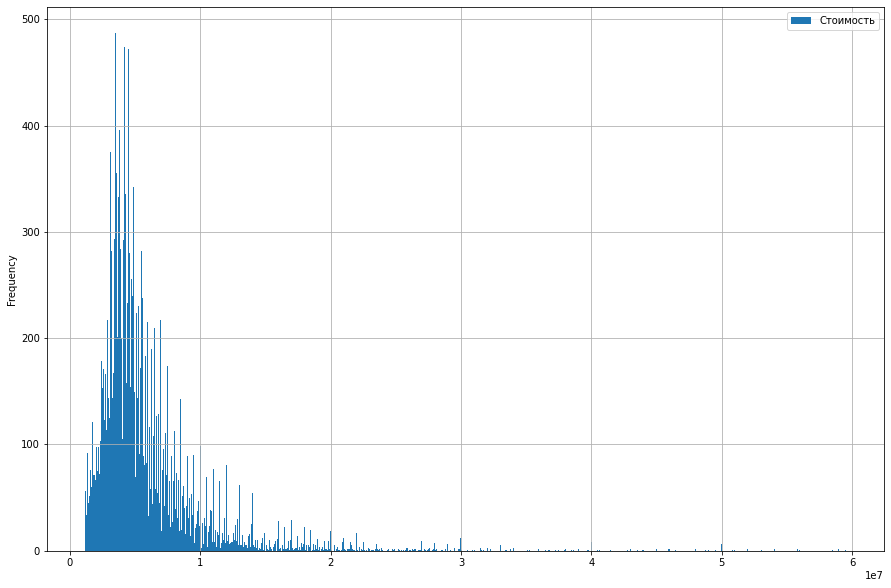

In [27]:
data.plot(kind='hist', y='last_price', bins=1000, 
          label='Cтоимость', grid=True, legend=True, figsize=(15, 10));

<AxesSubplot:>

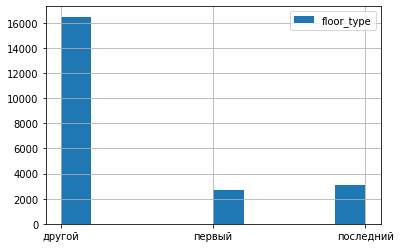

In [28]:
data['floor_type'].hist(legend=True)

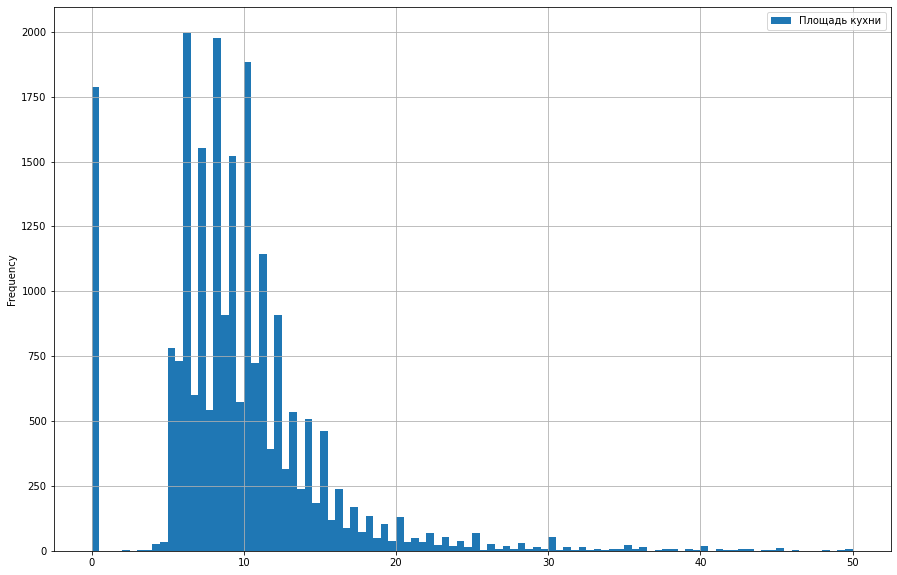

In [29]:
data.plot(kind='hist', y='kitchen_area', bins=100, 
          label='Площадь кухни', grid=True, legend=True, figsize=(15, 10));

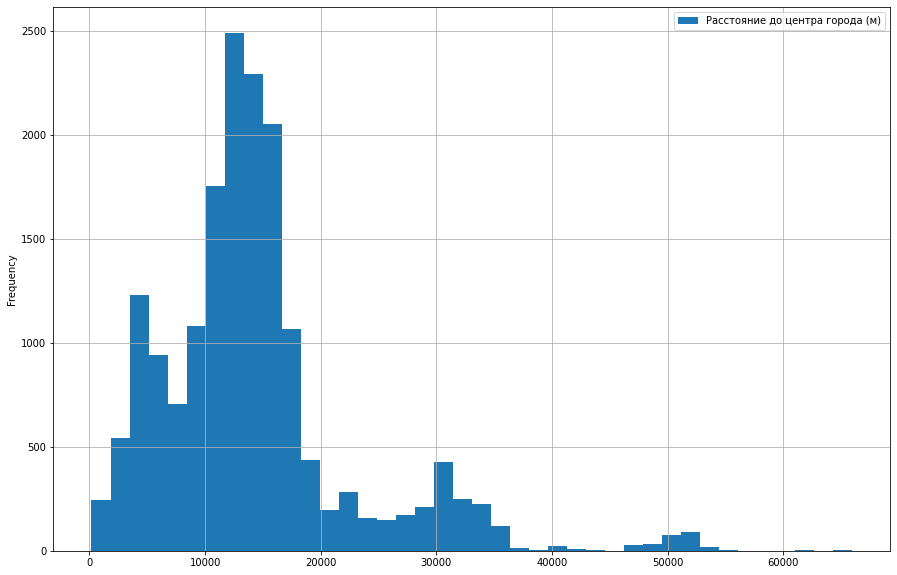

In [30]:
data.plot(kind='hist', y='cityCenters_nearest', bins=40, 
          label='Расстояние до центра города (м)', grid=True, legend=True, figsize=(15, 10));

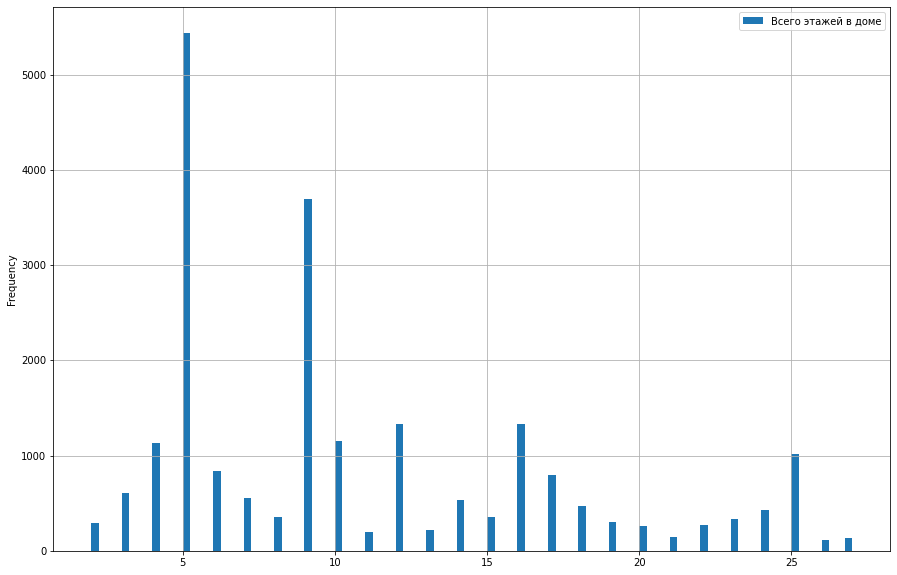

In [31]:
data.plot(kind='hist', y='floors_total', bins=100, 
          label='Всего этажей в доме', grid=True, legend=True, figsize=(15, 10));

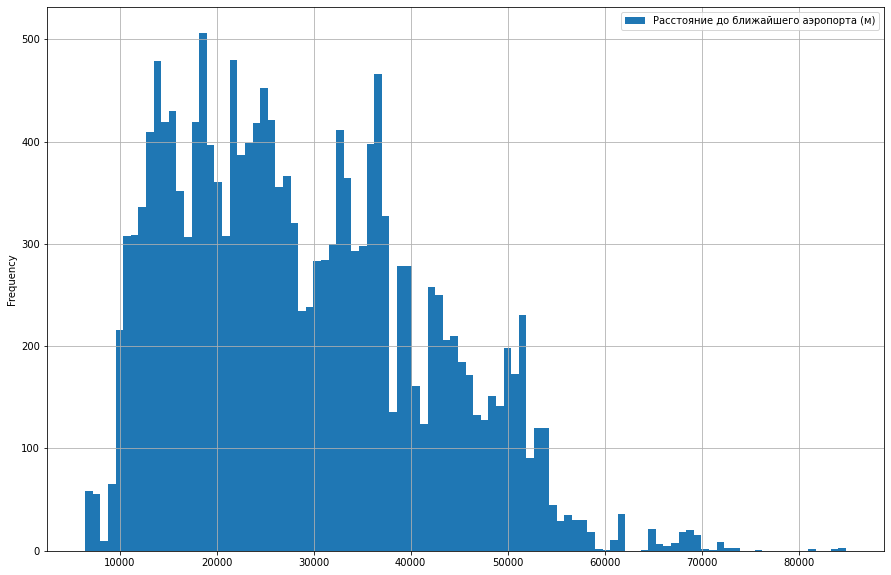

In [32]:


data.plot(kind='hist', y='airports_nearest', bins=100, 
          label='Расстояние до ближайшего аэропорта (м)', grid=True, legend=True, figsize=(15, 10));

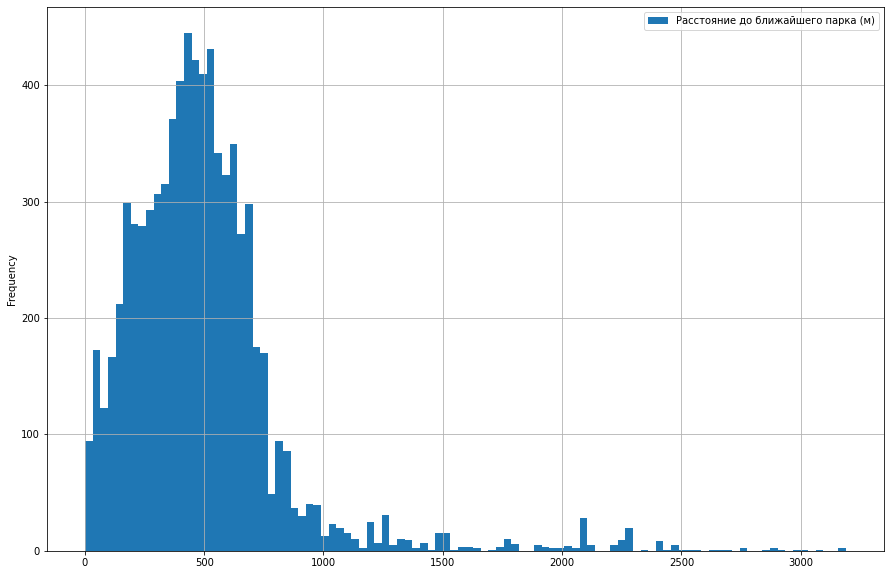

In [33]:
data.plot(kind='hist', y='parks_nearest', bins=100, 
          label='Расстояние до ближайшего парка (м)', grid=True, legend=True, figsize=(15, 10));

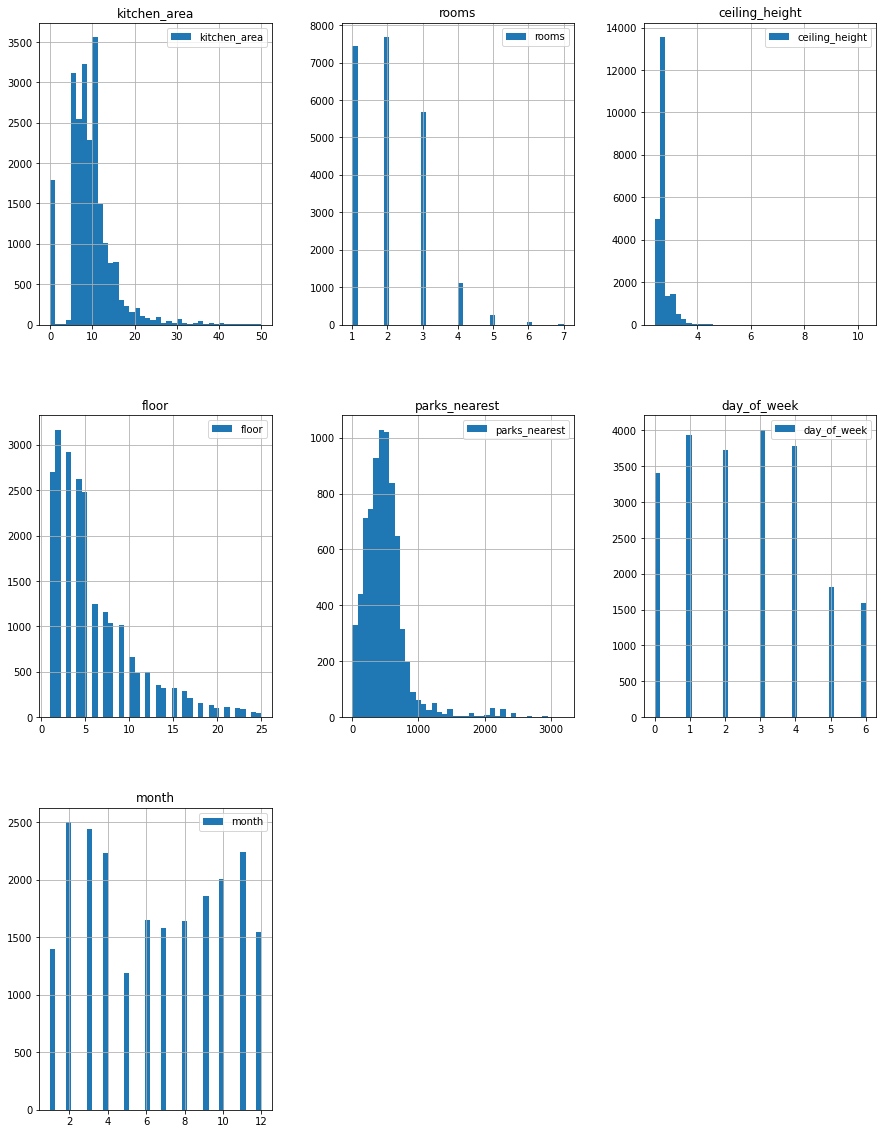

In [34]:
data.hist(column=['kitchen_area', 'rooms', 
                  'ceiling_height', 'floor' , 
                  'parks_nearest', 'day_of_week', 'month'], figsize=(15, 20), bins = 40, legend=True);

Гистограммы для столбцов `total_area`, `living_area`, `last_price`, `rooms`, `ceiling_height`, `floor` напоминают график распределения Пуассона.

По столбцу `floor_type` можно узнать, что наибольшее число квартир находится не на первом и не на последнем этаже. На первом этаже наименьшее количество квартир.

Большая часть кухонь имеет площадь 6, 7, 8, 9, 10 м^2, при дальнейшем увеличении площади кухни количество квартир падает.

Больше всего квартир, у которых 2 комнаты, график зависимости количества квартир от количества комнат напоминает график Нормального распределения.

Больше всего квартир в домах, в которых 5 этажей, на втором месте по числу квартир - девятиэтажные дома. В других домах квартир значительно меньше. 

Аэропорт находится на расстоянии примерно 18 км от большинства квартир. 

Парк находится на расстоянии примерно 500 м от большинства квартир, график зависимости количества квартир от расстояния до парка похож на график Нормального распределения. 

Большинство объявлений были опубликованы во вторник и четверг, меньше всего опубликовано в выходные. 

Больше всего объявлений опубликовали в марте и феврале. Меньше всего объявлений в мае, с каждым следующим месяцем количество объявлений растет с небольшими колебаниями до ноября включительно. 



#### Изучим, как быстро продавались квартиры (столбец `days_exposition`)

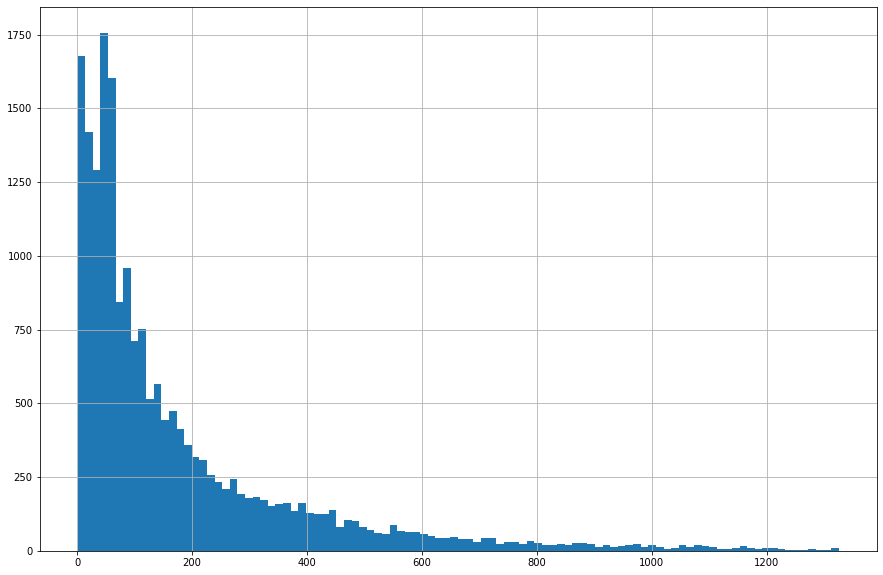

In [36]:
data.query('days_exposition !=0')['days_exposition'].hist(bins=100, figsize=(15, 10)); # убираем значения в столбце days_exposition = 0, поскольку они означают, что квартира не продана на момент получения данных

In [37]:
print("Среднее число дней, которое было размещено объявление:", data.query('days_exposition !=0')['days_exposition'].mean())
print("Медианное число дней, которое было размещено объявление:", data.query('days_exposition !=0')['days_exposition'].median())

Среднее число дней, которое было размещено объявление: 178.6105786665285
Медианное число дней, которое было размещено объявление: 95.0


Чаще всего продажа занимает меньше 200 дней. Можно считать быстрыми продажи менее менее чем за 25 дней и долгими продажи более чем за 400 дней. 

In [38]:
# check
data[data['days_exposition'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week,month,year,cityCenters_nearest_km,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2,755.0,0,120370.370370,3,3,2019,16.0,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.0,22,NaN,...,NaN,0,NaN,0,110544.692737,3,4,2019,12.0,другой
44,13,5350000.0,40.00,2018-11-18,1,2.65,22,30.0,3,NaN,...,620.0,1,1152.0,0,133750.000000,6,11,2018,12.0,другой
45,17,5200000.0,50.60,2018-12-02,2,2.65,9,30.3,7,NaN,...,NaN,0,NaN,0,102766.798419,6,12,2018,13.0,другой
46,17,6600000.0,52.10,2019-01-31,2,2.60,24,29.7,9,NaN,...,NaN,0,NaN,0,126679.462572,3,1,2019,13.0,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5,45.5,3,NaN,...,NaN,0,NaN,0,33439.490446,1,9,2018,NaN,другой
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26,71.4,17,NaN,...,NaN,0,NaN,0,147586.206897,4,11,2018,11.0,другой
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5,17.3,5,NaN,...,NaN,0,NaN,0,80322.580645,3,1,2019,52.0,последний
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,796.0,3,381.0,0,72490.845228,1,3,2017,4.0,другой


Рассмотрим отдельно, как изменится гистограмма продаж для апартаментов, не апартаментов и строк, у которых столбец `is_apartment` не заполнен.


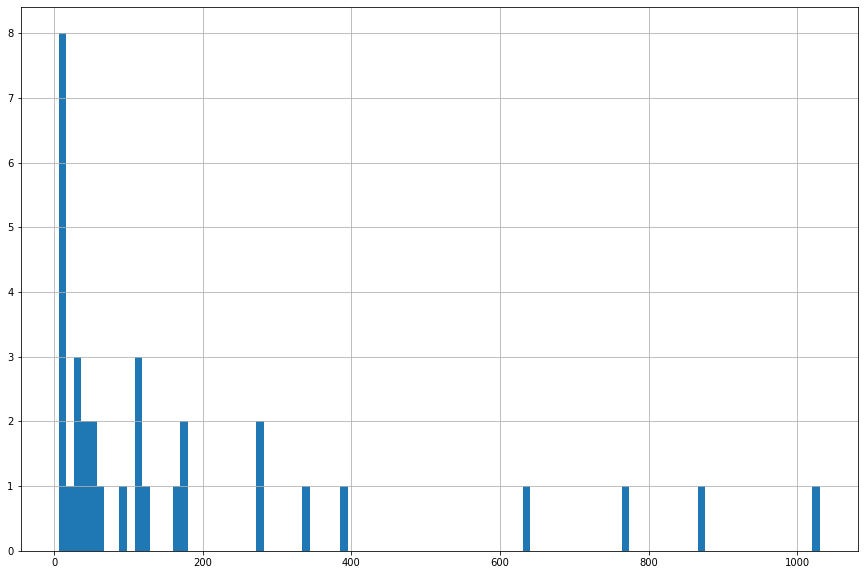

In [39]:
data.query('(days_exposition !=0) &(is_apartment==True)')['days_exposition'].hist(bins=100, figsize=(15, 10));

Количество апартаментов мало, поэтому исследовать скорость их продажи сложно.

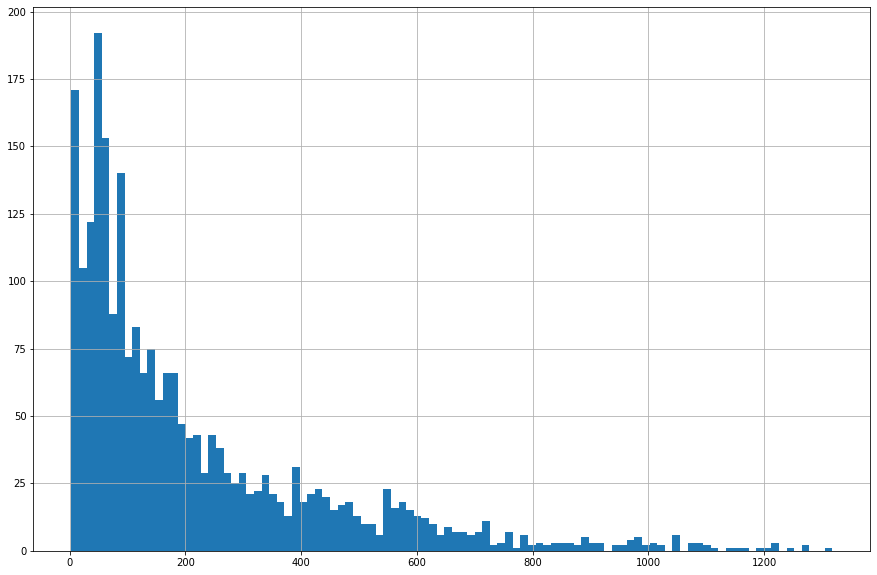

In [40]:
data.query('(days_exposition !=0) &(is_apartment==False)')['days_exposition'].hist(bins=100, figsize=(15, 10));

Гистограмма для квартир, не являющихся апартаментами напоминает гистограмму, построенную для всех данных.

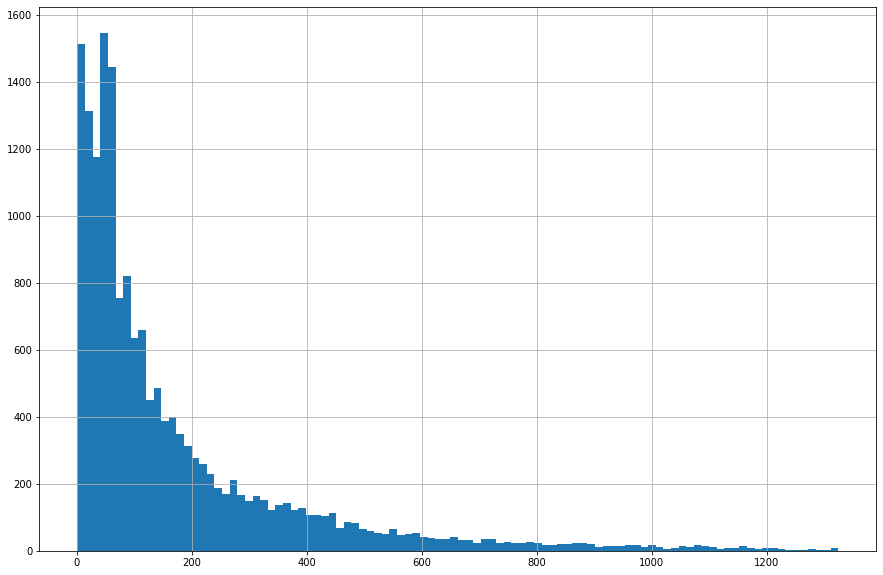

In [41]:
data.query('(days_exposition !=0) &(is_apartment.isna())')['days_exposition'].hist(bins=100, figsize=(15, 10));

Гистограмма для квартир, у которых не заполнен столбец `is_apartment`, напоминает гистограмму, построенную для всех данных.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [42]:
print('Коэффициент корреляции Пирсона для колонок total_area и last_price:', data['total_area'].corr(data['last_price']))

Коэффициент корреляции Пирсона для колонок total_area и last_price: 0.7546514385472073


Зависимость стоимости от общей площади квартиры высокая.

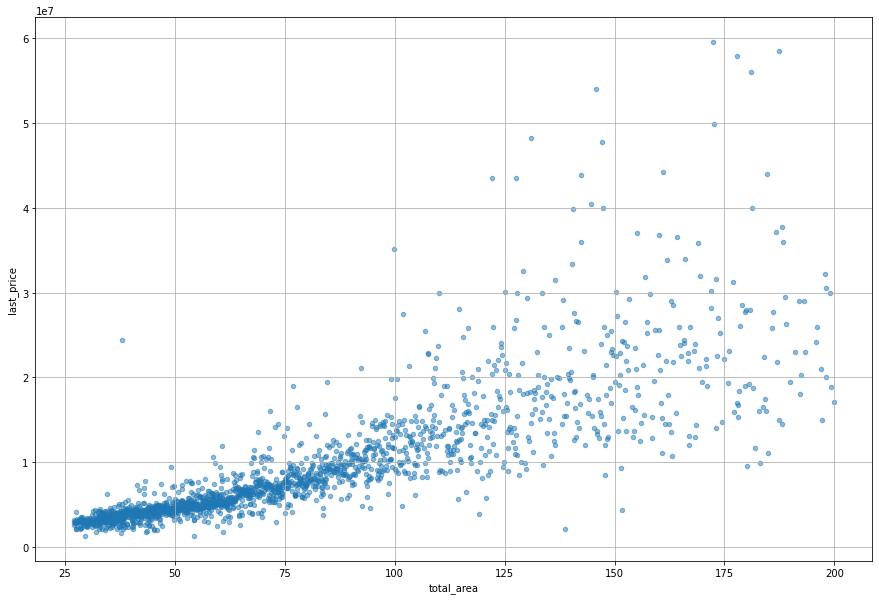

In [43]:
data.pivot_table(index='total_area', values='last_price').reset_index().\
plot(x='total_area', y='last_price', kind='scatter', alpha=0.5, figsize=(15, 10), grid=True); # построение сводной таблицы и графика вида scatter   

Общая площадь квартиры увеличивается при увеличении стоимости почти линейно, если общая площадь <=100, а стоимость <= 2*10^7. Далее положения точек на графике становятся более хаотичными.

In [44]:
print('Коэффициента корреляции Пирсона для колонок living_area и last_price:', data['living_area'].corr(data['last_price']))

Коэффициента корреляции Пирсона для колонок living_area и last_price: 0.6068403509163283


Зависимость стоимости от жилой площади квартиры средняя.

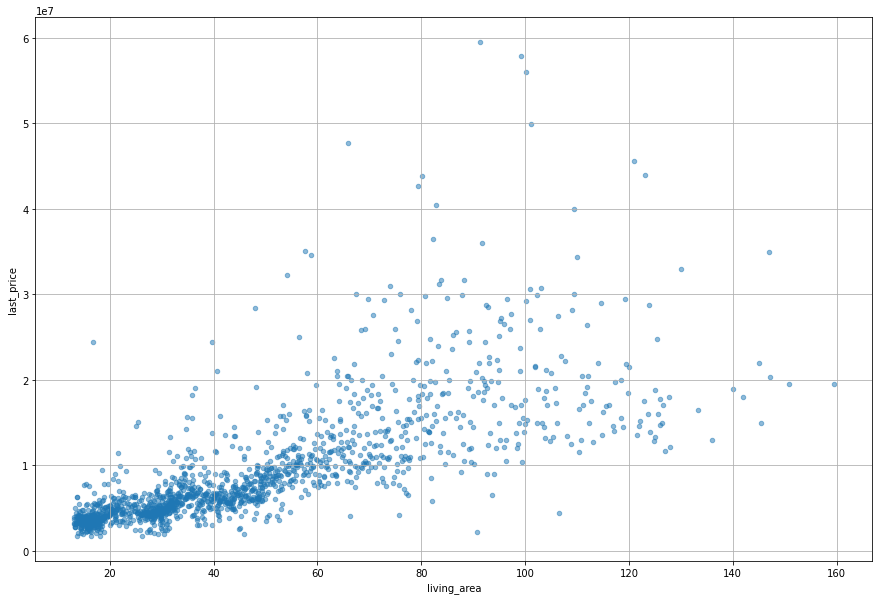

In [45]:
data.pivot_table(index='living_area', values='last_price').reset_index().\
plot(x='living_area', y='last_price', kind='scatter', alpha=0.5, figsize=(15, 10), grid=True);

Жилая площадь квартиры увеличивается при увеличении стоимости почти линейно с небольшими колебаниями, если жилая площадь <=60, а стоимость <= 1.5*10^7. Далее положения точек на графике становятся более хаотичными.

In [46]:
print('Коэффициента корреляции Пирсона для колонок kitchen_area и last_price:', data['kitchen_area'].corr(data['last_price']))

Коэффициента корреляции Пирсона для колонок kitchen_area и last_price: 0.4746849688770243


Зависимость стоимости от общей площади кухни не очень высокая.

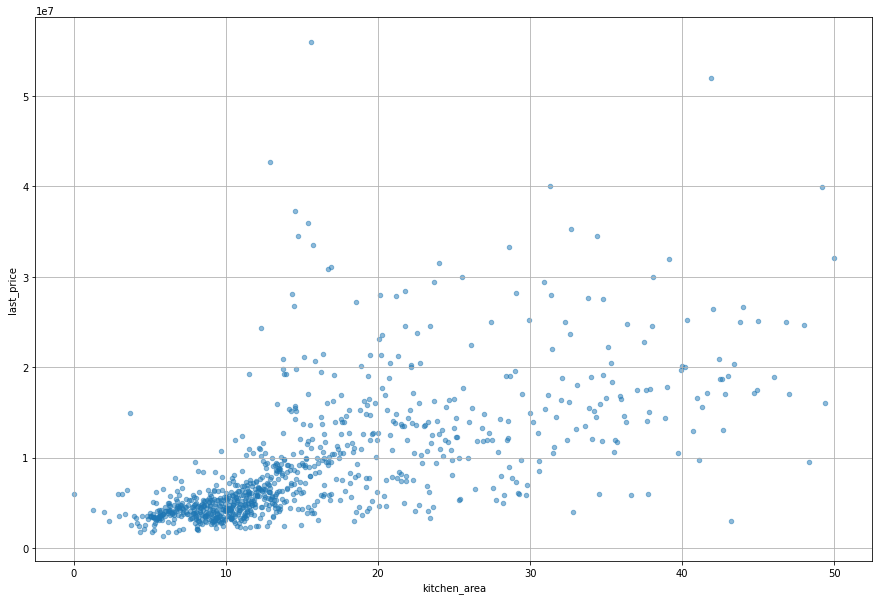

In [47]:
data.pivot_table(index='kitchen_area', values='last_price').reset_index().\
plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.5, figsize=(15, 10), grid=True);

У большинства квартир площадь кухни меньше 20 м^2 и стоимость меньше 10^7. Для других квартир точки графика гораздо менее сконцентрированы.

In [48]:
print('Коэффициента корреляции Пирсона для колонок rooms и last_price:', data['rooms'].corr(data['last_price']))

Коэффициента корреляции Пирсона для колонок rooms и last_price: 0.45517707248590067


Зависимость стоимости от количества комнат не очень высокая.

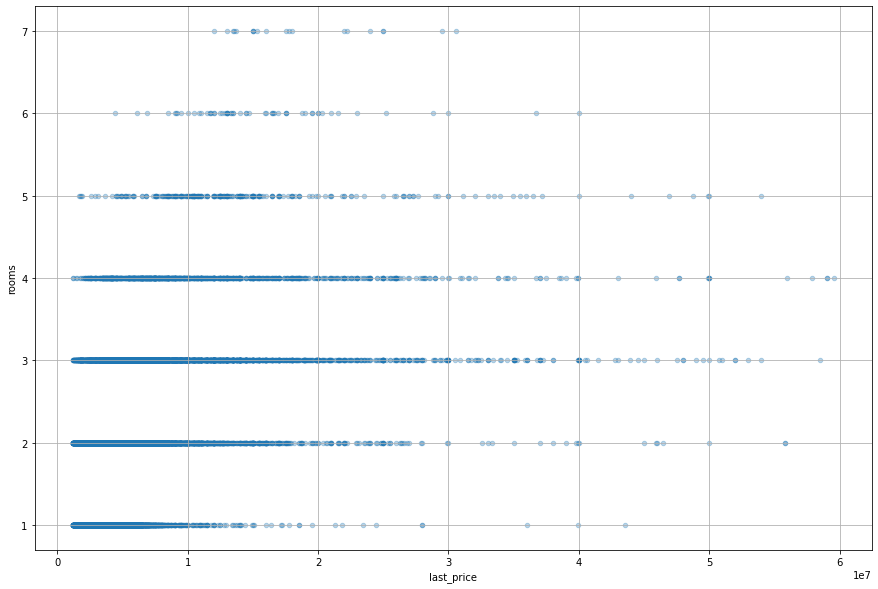

In [49]:
data[['rooms', 'last_price']].plot(x='last_price', y='rooms', kind='scatter', alpha=0.3, figsize=(15, 10), grid=True);

Цена большей части квартир меньше 3*10^7. При увеличении количества комнат до 3 включительно увеличивается количество квартир дороже 10^7, далее присутствует противоположная тенденция.

In [50]:
data_floor_type_and_last_price = data.loc[:, ('floor_type', 'last_price')]

data_floor_type_and_last_price.loc[data_floor_type_and_last_price['floor_type']=='первый', 'floor_type_digital'] = 0 
data_floor_type_and_last_price.loc[data_floor_type_and_last_price['floor_type']=='другой', 'floor_type_digital'] = 1
data_floor_type_and_last_price.loc[data_floor_type_and_last_price['floor_type']=='последний', 'floor_type_digital'] = 2

print('Коэффициента корреляции Пирсона для колонок floor_type и last_price:', 
      data_floor_type_and_last_price['floor_type_digital'].corr(data_floor_type_and_last_price['last_price']))

Коэффициента корреляции Пирсона для колонок floor_type и last_price: 0.04785172351153268


Зависимость стоимости от вида этажа практически отсутствует.

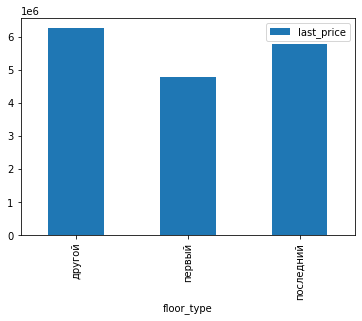

In [51]:
data.pivot_table(index='floor_type', values='last_price').plot(kind='bar');


Наибольшая стоимость у квартир, находящихся не на первом и не на последнем этаже. Стоимость квартир на первом этаже наименьшая.

In [52]:
print('Коэффициента корреляции Пирсона для колонок day_of_week и last_price:', data['day_of_week'].corr(data['last_price']))

Коэффициента корреляции Пирсона для колонок day_of_week и last_price: -0.015489267138552204


Зависимость стоимости от дня недели практически отсутствует.

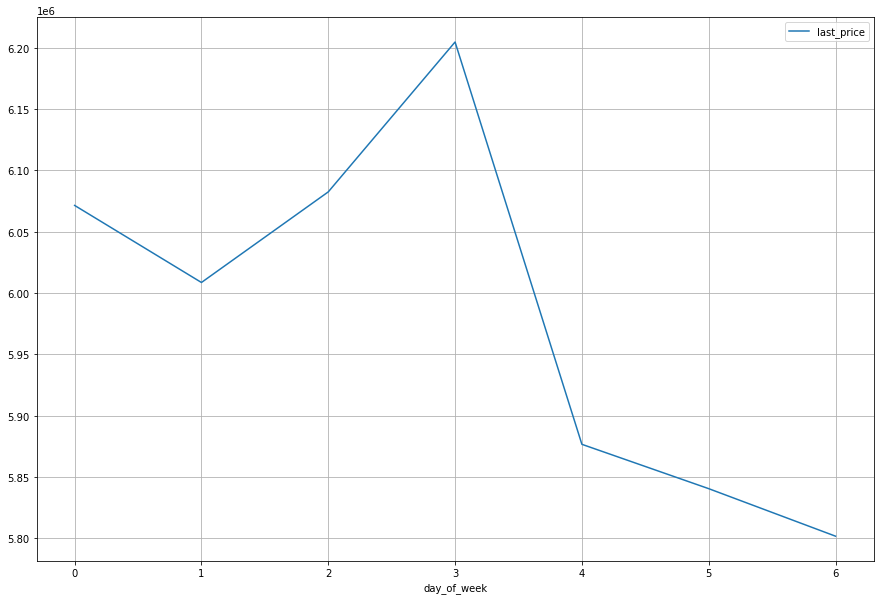

In [53]:
data.pivot_table(index='day_of_week', values='last_price').plot(grid=True, figsize=(15, 10));

Если объявление опубликовано в четверг, средняя стоимость наибольшая. Если объявление опубликовано в воскресенье, средняя стоимость наименьшая. 

In [54]:
print('Коэффициента корреляции Пирсона для колонок month и last_price:', data['month'].corr(data['last_price']))

Коэффициента корреляции Пирсона для колонок month и last_price: 0.0026824366543090577


Зависимость стоимости от месяца практически отсутствует.

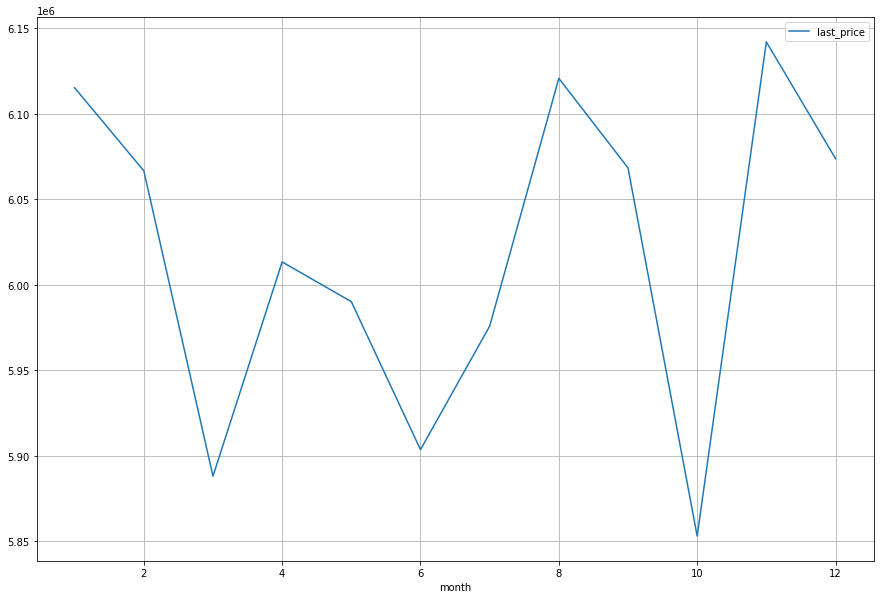

In [55]:
data.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(15, 10));

Если объявление опубликовано в ноябре, августе и январе, средняя стоимость наибольшая. Если объявление опубликовано в марте и октябре, средняя стоимость наименьшая. 

In [56]:
print('Коэффициента корреляции Пирсона для колонок year и last_price:', data['year'].corr(data['last_price']))

Коэффициента корреляции Пирсона для колонок year и last_price: -0.03553412239362229


Зависимость стоимости от года практически отсутствует.

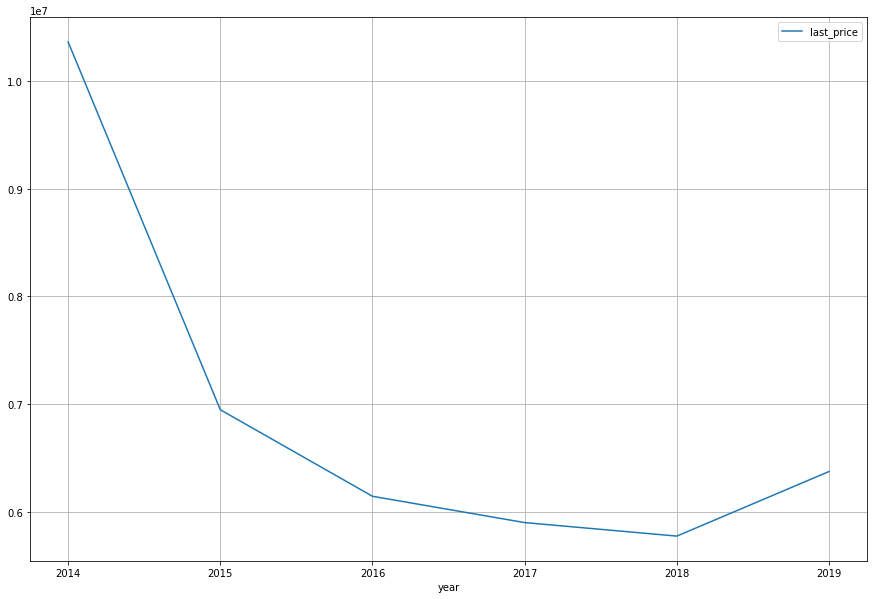

In [57]:
data.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(15, 10));

В объявлениях, опубликованных в 2014 году, средняя стоимость квартиры наибольшая, с каждым следующим годом цена падала до 2018 включительно. В 2019 стоимость стала немного больше, чем в 2016.

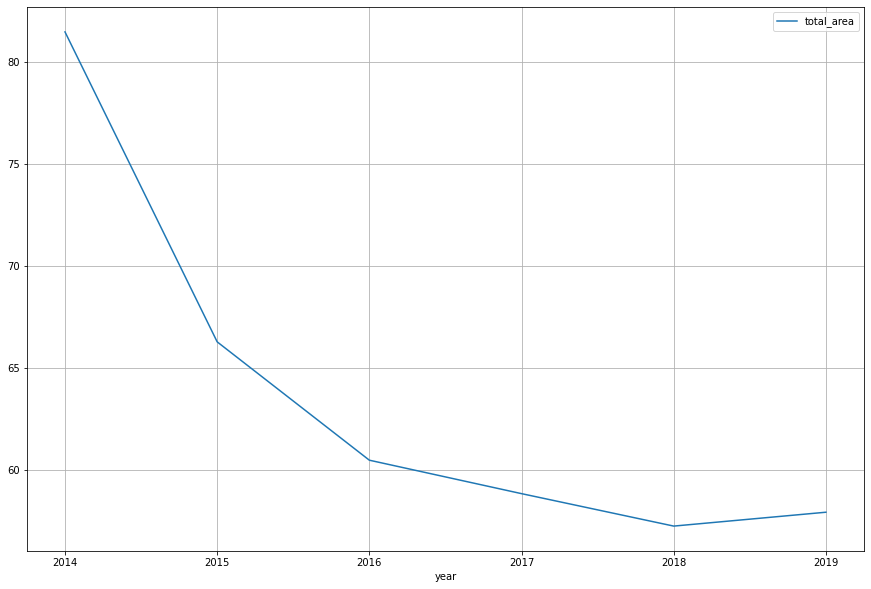

In [58]:
data.pivot_table(index='year', values='total_area').plot(grid=True, figsize=(15, 10));

В объявлениях, опубликованных в 2014 году, средняя площадь квартиры наибольшая, с каждым следующим годом площадь падала до 2018 включительно. В 2019 стоимость стала немного больше, чем в 2018.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

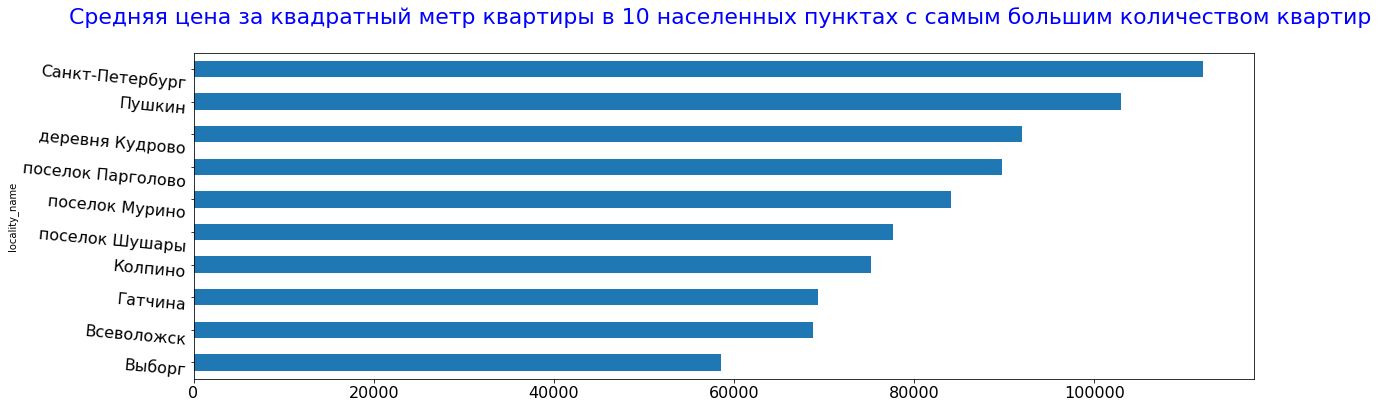

In [59]:
top_10_locality = data.groupby('locality_name')['last_price'].count().\
sort_values(ascending=False).head(10).index # получение 10 населенных пунктов с самым большим количеством квартир

data_price_per_meter_mean = data.query('locality_name in @top_10_locality').\
pivot_table(index='locality_name', values='price_per_meter') # средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

data_price_per_meter_mean.sort_values(by='price_per_meter', ascending=True).\
plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16).\
set_title('Средняя цена за квадратный метр квартиры в 10 населенных пунктах с самым большим количеством квартир ' + '\n', fontsize = 22, color = 'Blue');    

In [60]:
# check
data['price_per_meter'].head()

0    120370.370370
1     82920.792079
2     92785.714286
4    100000.000000
5     95065.789474
Name: price_per_meter, dtype: float64

Населенные пункты с самой высокой средней стоимостью квадратного метра: Всеволожск, Выборг. 
Населенные пункты с самой низкой средней стоимостью квадратного метра: Санкт-Петербург, Пушкин. 

#### Вычислите среднюю цену каждого километра до центра города в Санкт-Петербурге, опишите, как стоимость объектов зависит от расстояния до центра города

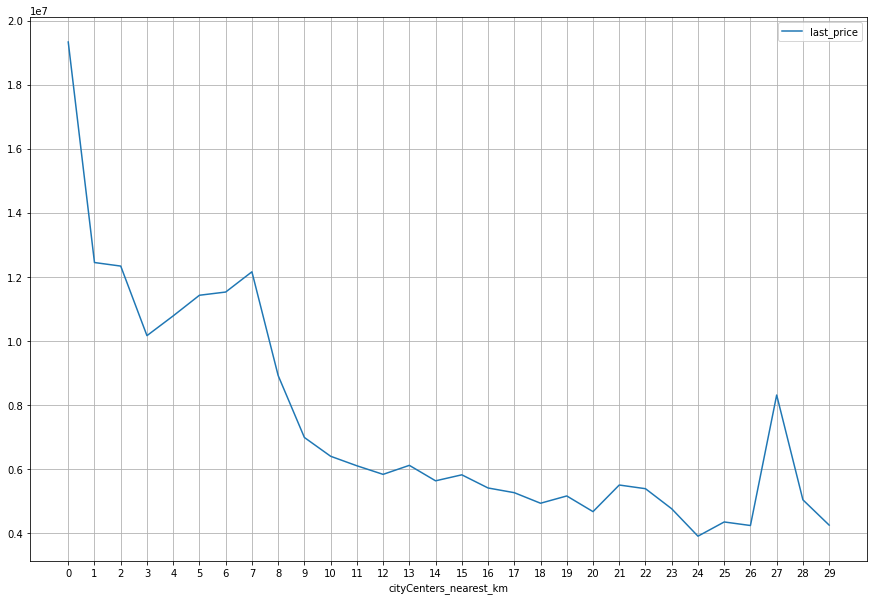

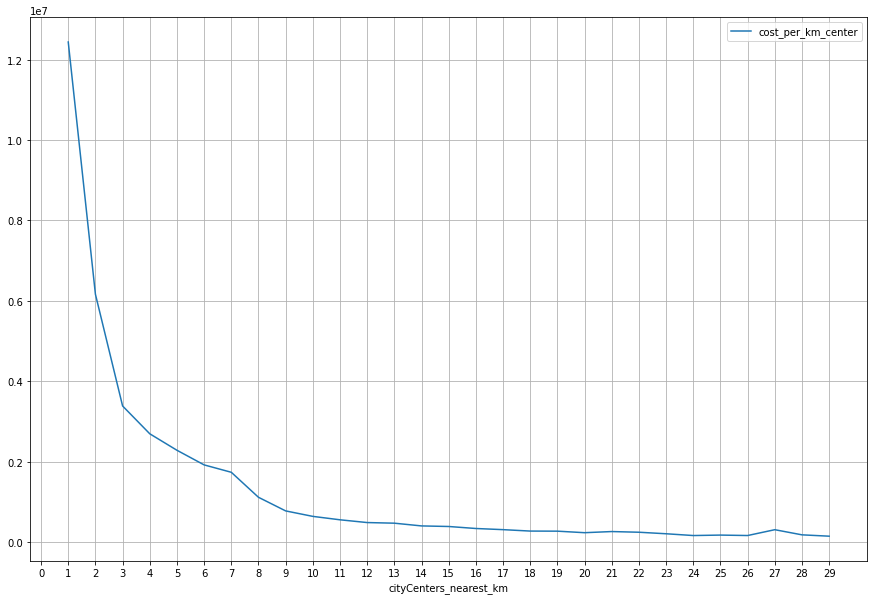

In [61]:
data['cost_per_km_center'] = data['last_price'] / data['cityCenters_nearest_km'] # отношение цены квартиры к расстоянию до центра

data_spb = data.query('locality_name == "Санкт-Петербург"') # данные по квартирам из Санкт-Петербурга

data_spb_pivot = data_spb.pivot_table(index='cityCenters_nearest_km', values='last_price')

data_spb_pivot.plot(grid=True, figsize=(15, 10), xticks=data_spb_pivot.index);

data_spb.pivot_table(index='cityCenters_nearest_km', values='cost_per_km_center').\
plot(grid=True, figsize=(15, 10), xticks=data_spb_pivot.index);

Дороже всего квартиры в центре и на расстоянии 1 км от центра, дешевле всего - на расстоянии 24 км от центра.

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Это ошибочный показатель
        
        data['cost_per_km_center'] = data['last_price'] / data['cityCenters_nearest_km'] 
             
Возьмем 10 условных квартир равной стоимостью 10 млн. руб., но расположенных на первом, втором, третьем и т.д. километрах от центра.
        
При твоем способе подсчета если 10 млн. руб. разделить на само значение километра мы получим 1, 0.5, 0.333 ... млн. руб. на км., но квартиры по стоимости равны ...., а в выводе мы можем предположить, что цена падает, что будет ошибкой
        
Стоит подумать над алгоритмом, т.е. сам параметр 'cost_per_km_center' вызывает много вопросов

### Общий вывод

Большая часть гистограмм количества записей по столбцам выглядят как графики нормального распределения и распределения Пуассона. 

1. Наибольшее число квартир находится не на первом и не на последнем этаже. На первом этаже наименьшее количество квартир.

2. Больше всего объявлений опубликовали в марте и феврале. Меньше всего объявлений в мае, с каждым следующим месяцем количество объявлений растет с небольшими колебаниями до ноября включительно. 

3. Чаще всего продажа занимает меньше 200 дней. Можно считать быстрыми продажи менее менее чем за 25 дней и долгими продажи более чем за 400 дней. 

4. Общая площадь квартиры увеличивается при увеличении стоимости почти линейно, если общая площадь <=100, а стоимость <= 2*10^7.

5. Жилая площадь квартиры увеличивается при увеличении стоимости почти линейно с небольшими колебаниями, если жилая площадь <=60, а стоимость <= 1.5*10^7.

6. У большинства квартир площадь кухни меньше 20 м^2 и стоимость меньше 10^7. 

7. Цена большей части квартир меньше 3*10^7. При увеличении количества комнат до 3 включительно увеличивается количество квартир дороже 10^7, далее присутствует противоположная тенденция.

8. Наибольшая стоимость у квартир, находящихся не на первом и не на последнем этаже. Стоимость квартир на первом этаже наименьшая.

9. Если объявление опубликовано в четверг, средняя стоимость наибольшая. Если объявление опубликовано в воскресенье, средняя стоимость наименьшая. 

10. Если объявление опубликовано в ноябре, августе и январе, средняя стоимость наибольшая. Если объявление опубликовано в марте и октябре, средняя стоимость наименьшая. 

11. В объявлениях, опубликованных в 2014 году, средняя стоимость квартиры наибольшая, с каждым следующим годом цена падала до 2018 включительно. В 2019 стоимость стала немного больше, чем в 2016.

12. В объявлениях, опубликованных в 2014 году, средняя площадь квартиры наибольшая, с каждым следующим годом площадь падала до 2018 включительно. В 2019 стоимость стала немного больше, чем в 2018.

13. Населенные пункты с самой высокой средней стоимостью квадратного метра: Всеволожск, Выборг. Населенные пункты с самой низкой средней стоимостью квадратного метра: Санкт-Петербург, Пушкин. 

14. Дороже всего квартиры в центре и на расстоянии 1 км от центра, дешевле всего - на расстоянии 24 км от центра.